<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/3week/winequality_white_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import numpy as np

In [26]:
# -----------------------------
# 1) 데이터 불러오기
# -----------------------------
file_path = "/content/winequality-white.csv"
df = pd.read_csv(file_path, sep=";")

In [27]:
X = df.drop("quality", axis=1)   # 독립변수
y = df["quality"]                # 종속변수 (다중 클래스)

In [28]:
from tensorflow.keras import layers, models
import numpy as np
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values
# X = X.values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3940 - loss: 1.5305 - val_accuracy: 0.5102 - val_loss: 1.1860
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5095 - loss: 1.1719 - val_accuracy: 0.5383 - val_loss: 1.1149
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5187 - loss: 1.1422 - val_accuracy: 0.5446 - val_loss: 1.0828
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5393 - loss: 1.0770 - val_accuracy: 0.5408 - val_loss: 1.0602
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5636 - loss: 1.0671 - val_accuracy: 0.5357 - val_loss: 1.0466
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5483 - loss: 1.0695 - val_accuracy: 0.5536 - val_loss: 1.0322
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5553 - loss: 1.0736 - val_accuracy: 0.5638 - val_loss: 1.0298
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5566 - loss: 1.0494 - val_accuracy: 0.5574 - val

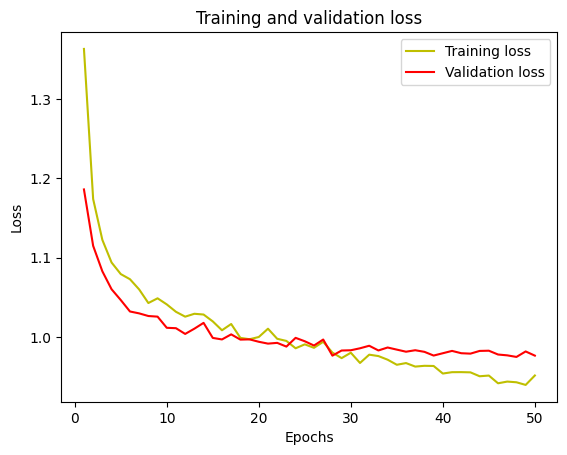

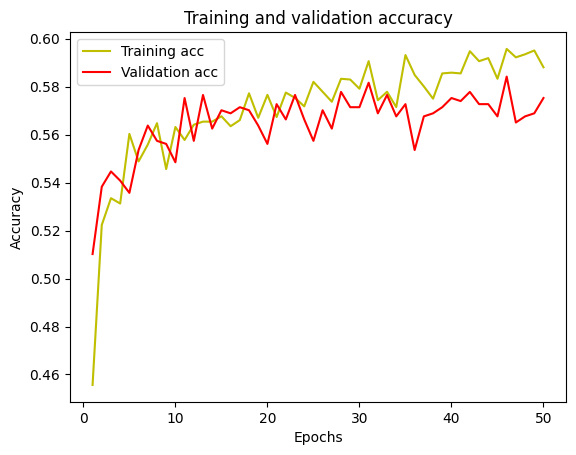

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.71      0.10      0.17        51
           2       0.59      0.57      0.58       295
           3       0.52      0.74      0.61       409
           4       0.55      0.33      0.41       183
           5       0.00      0.00      0.00        33

    accuracy                           0.55       980
   macro avg       0.56      0.31      0.33       980
weighted avg       0.54      0.55      0.52       980

[[  1   0   5   3   0   0]
 [  0   5  31  14   1   0]
 [  0   2 169 119   5   0]
 [  0   0  74 301  34   0]
 [  0   0   8 114  60   1]
 [  0   0   0  24   9   0]]


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

---

---

In [31]:
# -----------------------------
# 2) quality를 이진 분류로 변환
# -----------------------------
df["good_quality"] = (df["quality"] >= 6).astype(int)  # 6 이상이면 1, 아니면 0

X = df.drop(["quality", "good_quality"], axis=1)  # 독립변수
y = df["good_quality"]                           # 종속변수 (이진)

In [32]:
# Y = pd.get_dummies(y).values
# X = X.values

In [33]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [34]:
# 두번째꺼


# -------------------------------------------------
# 5) 모델 정의
# -------------------------------------------------
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64)(inputs)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Dense(32)(x)
x = tf.keras.layers.ReLU()(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# -------------------------------------------------
# 7) 학습
# -------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=16,
    verbose=1
)

y_pred = model.predict(X_test)

y_test_class = y_test.astype(int)
y_pred_class = (y_pred > 0.5).astype(int)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 7), output.shape=(None, 1)

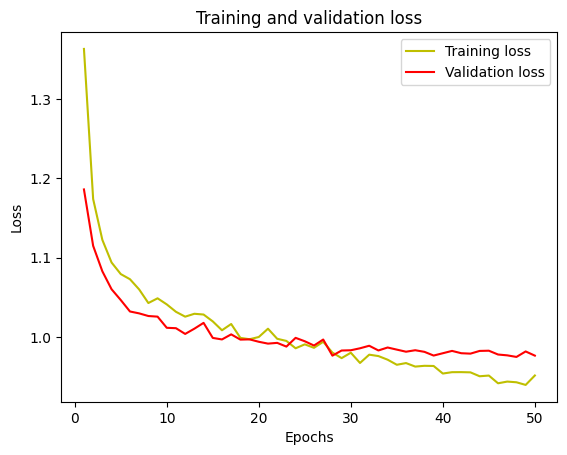

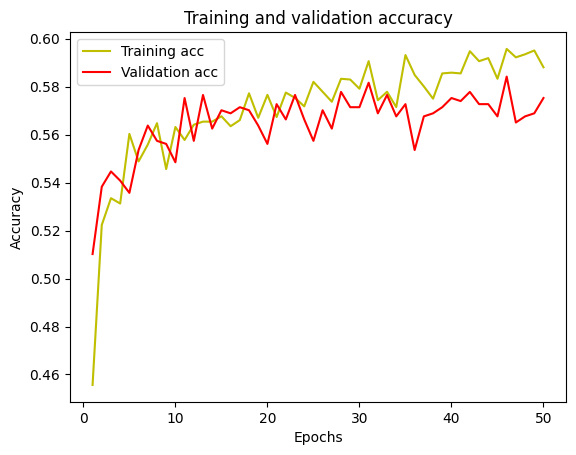

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.71      0.10      0.17        51
           2       0.59      0.57      0.58       295
           3       0.52      0.74      0.61       409
           4       0.55      0.33      0.41       183
           5       0.00      0.00      0.00        33

    accuracy                           0.55       980
   macro avg       0.56      0.31      0.33       980
weighted avg       0.54      0.55      0.52       980

[[  1   0   5   3   0   0]
 [  0   5  31  14   1   0]
 [  0   2 169 119   5   0]
 [  0   0  74 301  34   0]
 [  0   0   8 114  60   1]
 [  0   0   0  24   9   0]]


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

In [37]:
# 처음꺼 지피티가 수정한거

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)

# 예측
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_test_class = y_test.astype(int)

# 학습 곡선
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], 'y', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, history.history['accuracy'], 'y', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 분류 성능 평가
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))


Epoch 1/20


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 7), output.shape=(None, 1)

In [38]:
# 맨처음꺼

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# -------------------------------------------------
# 5) 모델 정의 (작고 탄탄한 MLP)
# -------------------------------------------------
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64)(inputs)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Dense(32)(x)
x = tf.keras.layers.ReLU()(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.summary()


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=['accuracy'])

model.summary()

# -------------------------------------------------
# 7) 학습
# -------------------------------------------------
history = model.fit(
    train_ds,
    validation_split=0.2,
    epochs=20)


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'train_ds' is not defined